In [1]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  adhithiyan3


Your Kaggle Key:

  ································


100%|██████████| 2.29G/2.29G [10:38<00:00, 3.86MB/s]


In [1]:
!pip install opencv-python scikit-learn-intelex tensorflow==2.13 pandas

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 2.7 MB/s eta 0:00:0000:0100:01


In [12]:
import os
import matplotlib.pyplot as plt
import cv2 
import pandas as pd
import numpy as np
from sklearnex.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image

In [2]:
folder_path = 'chest-xray-pneumonia/chest_xray'

train_normal_path =os.path.join( folder_path,'train','NORMAL')
print(str(train_normal_path))
filenames = os.listdir(train_normal_path)
label='train'
result='NORMAL'
full_paths = [os.path.join(folder_path,label,result, filename) for filename in filenames]
df_train =pd.DataFrame({
    "Filename": full_paths,
    "Label": label,
    "Chest X-Ray": result
    })
df_train 

chest-xray-pneumonia/chest_xray/train/NORMAL


,Filename,Label,Chest X-Ray
0,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL
1,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL
2,chest-xray-pneumonia/chest_xray/train/NORMAL/I...,train,NORMAL
3,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL
4,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL
...,...,...,...
1337,chest-xray-pneumonia/chest_xray/train/NORMAL/I...,train,NORMAL
1338,chest-xray-pneumonia/chest_xray/train/NORMAL/I...,train,NORMAL
1339,chest-xray-pneumonia/chest_xray/train/NORMAL/I...,train,NORMAL
1340,chest-xray-pneumonia/chest_xray/train/NORMAL/I...,train,NORMAL


In [3]:
train_normal_path =os.path.join( folder_path,'train','PNEUMONIA')
print(str(train_normal_path))
filenames = os.listdir(train_normal_path)
label='train'
result='PNEUMONIA'
full_paths = [os.path.join(folder_path,label,result, filename) for filename in filenames]
df_train1 =pd.DataFrame({
    "Filename": full_paths,
    "Label": label,
    "Chest X-Ray": result
    })
df_train = pd.concat([df_train, df_train1])
df_train


chest-xray-pneumonia/chest_xray/train/PNEUMONIA


,Filename,Label,Chest X-Ray
0,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL
1,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL
2,chest-xray-pneumonia/chest_xray/train/NORMAL/I...,train,NORMAL
3,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL
4,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL
...,...,...,...
3870,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,train,PNEUMONIA
3871,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,train,PNEUMONIA
3872,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,train,PNEUMONIA
3873,chest-xray-pneumonia/chest_xray/train/PNEUMONI...,train,PNEUMONIA


In [4]:
test_normal_path = os.path.join(folder_path,'test','NORMAL')
print(str(test_normal_path))
filenames = os.listdir(test_normal_path)
label='test'
result='NORMAL'
full_paths = [os.path.join(test_normal_path, filename) for filename in filenames]
df_test = pd.DataFrame({
    "Filename": full_paths,
    "Label": label,
    "Chest X-Ray": result
    })
df_test

chest-xray-pneumonia/chest_xray/test/NORMAL


,Filename,Label,Chest X-Ray
0,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
1,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
2,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
3,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
4,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
...,...,...,...
229,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
230,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
231,chest-xray-pneumonia/chest_xray/test/NORMAL/IM...,test,NORMAL
232,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL


In [5]:
test_normal_path = os.path.join(folder_path,'test','PNEUMONIA')
print(str(test_normal_path))
filenames = os.listdir(test_normal_path)
label='test'
result='PNEUMONIA'
full_paths = [os.path.join(folder_path,label,result, filename) for filename in filenames]
df_test1 = pd.DataFrame({
    "Filename": full_paths,
    "Label": label,
    "Chest X-Ray": result
    })

df_test = pd.concat([df_test, df_test1])
df_test

chest-xray-pneumonia/chest_xray/test/PNEUMONIA


,Filename,Label,Chest X-Ray
0,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
1,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
2,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
3,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
4,chest-xray-pneumonia/chest_xray/test/NORMAL/NO...,test,NORMAL
...,...,...,...
385,chest-xray-pneumonia/chest_xray/test/PNEUMONIA...,test,PNEUMONIA
386,chest-xray-pneumonia/chest_xray/test/PNEUMONIA...,test,PNEUMONIA
387,chest-xray-pneumonia/chest_xray/test/PNEUMONIA...,test,PNEUMONIA
388,chest-xray-pneumonia/chest_xray/test/PNEUMONIA...,test,PNEUMONIA


In [6]:
val_normal_path = os.path.join(folder_path,'val','NORMAL')
filenames = os.listdir(val_normal_path)
label='val'
result='NORMAL'
full_paths = [os.path.join(folder_path,label,result, filename) for filename in filenames]
df_val = pd.DataFrame({
    "Filename": full_paths,
    "Label": label,
    "Chest X-Ray": result
    })
df_val
val_pneumonia_path = os.path.join(folder_path,'val','PNEUMONIA')
filenames = os.listdir(val_pneumonia_path )
label='val'
result='PNEUMONIA'
full_paths = [os.path.join(folder_path,label,result, filename) for filename in filenames]
df_val1 = pd.DataFrame({
    "Filename": full_paths,
    "Label": label,
    "Chest X-Ray": result
    })
df_val = pd.concat([df_val, df_val1])
df_val


,Filename,Label,Chest X-Ray
0,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL
1,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL
2,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL
3,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL
4,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL
5,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL
6,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL
7,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL
0,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA
1,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA


chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0700-0001.jpeg


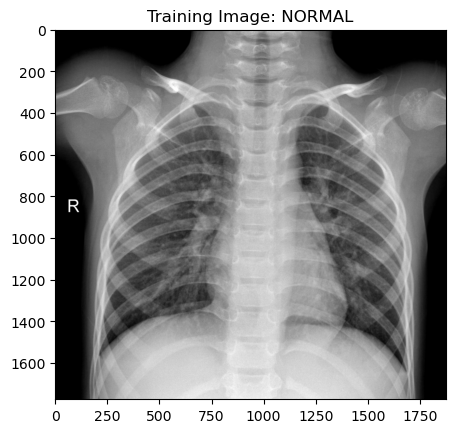

In [7]:
train_normal_img = df_train['Filename']
print(train_normal_img.tolist()[0])
plt.imshow(cv2.imread(train_normal_img.tolist()[0]))
plt.title('Training Image: NORMAL')
plt.show()


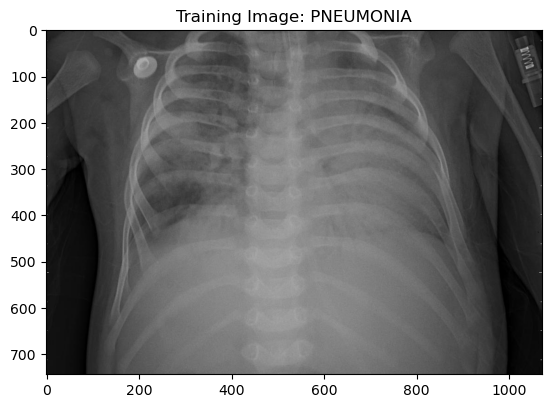

In [8]:
plt.imshow(cv2.imread(train_normal_img.tolist()[-1]))
plt.title('Training Image: PNEUMONIA')
plt.show()

In [7]:
df = pd.concat([df_train, df_test, df_val])
df['result'] = (df['Chest X-Ray'] == 'PNEUMONIA')
df

,Filename,Label,Chest X-Ray,result
0,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL,False
1,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL,False
2,chest-xray-pneumonia/chest_xray/train/NORMAL/I...,train,NORMAL,False
3,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL,False
4,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL,False
...,...,...,...,...
3,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA,True
4,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA,True
5,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA,True
6,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA,True


In [8]:
df['result'].replace(True, 1, inplace=True)
df['result'].replace(False, 0, inplace=True)
df


,Filename,Label,Chest X-Ray,result
0,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL,0
1,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL,0
2,chest-xray-pneumonia/chest_xray/train/NORMAL/I...,train,NORMAL,0
3,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL,0
4,chest-xray-pneumonia/chest_xray/train/NORMAL/N...,train,NORMAL,0
...,...,...,...,...
3,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA,1
4,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA,1
5,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA,1
6,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA,1


In [9]:
l1, l2, l3 = len(df_train), len(df_train)+len(df_test), len(df_train)+len(df_test)+len(df_val)
train, test, val = df.iloc[:l1, :], df.iloc[l1:l2, :], df.iloc[l2:,:]
val


,Filename,Label,Chest X-Ray,result
0,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL,0
1,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL,0
2,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL,0
3,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL,0
4,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL,0
5,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL,0
6,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL,0
7,chest-xray-pneumonia/chest_xray/val/NORMAL/NOR...,val,NORMAL,0
0,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA,1
1,chest-xray-pneumonia/chest_xray/val/PNEUMONIA/...,val,PNEUMONIA,1


In [10]:
IMG_HEIGHT, IMG_WIDTH = 128, 128

In [13]:
data_xx = df_train['Filename'].iloc[:].to_numpy()
images = []
for i in range(len(df_train)):
    print(data_xx[i])
    image = cv2.cvtColor(cv2.imread(data_xx[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = (cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)))/255.
    images.append(img)

chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0700-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0847-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0620-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0994-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0771-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-1035-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0428-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0224-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0511-0001-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0580-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0523-0001-0003.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0420-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0839-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL/NORMAL2-IM-0663-0001.jpeg
chest-xray-pneumonia/chest_xray/train/NORMAL

In [14]:
data_yy = df['result'].iloc[:l1]
result = np.array(data_yy)


In [15]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.25)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
    
model.add(Conv2D(64, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='valid'))
    
model.add(Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(Dropout(0.15))
model.add(MaxPooling2D((2, 2), padding='valid'))
    
model.add(Conv2D(128, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D((2, 2), padding='valid'))
    
model.add(Conv2D(256, (3, 3), padding='valid', activation='relu'))
model.add(Dropout(0.15))
model.add(MaxPooling2D((2, 2), padding='valid'))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 dropout (Dropout)           (None, 28, 28, 128)       0

In [20]:
history = model.fit(images_train,result_train, validation_data=(images_test,result_test), epochs=10,batch_size=8)

Epoch 1/10
489/489 [==============================] - 17s 36ms/step - loss: 0.0851 - accuracy: 0.9686 - val_loss: 0.0758 - val_accuracy: 0.9747
Epoch 2/10
489/489 [==============================] - 17s 36ms/step - loss: 0.0541 - accuracy: 0.9785 - val_loss: 0.0784 - val_accuracy: 0.9762
Epoch 3/10
489/489 [==============================] - 17s 35ms/step - loss: 0.0442 - accuracy: 0.9824 - val_loss: 0.0948 - val_accuracy: 0.9724
Epoch 4/10
489/489 [==============================] - 17s 35ms/step - loss: 0.0424 - accuracy: 0.9831 - val_loss: 0.0962 - val_accuracy: 0.9747
Epoch 5/10
489/489 [==============================] - 17s 35ms/step - loss: 0.0398 - accuracy: 0.9867 - val_loss: 0.1155 - val_accuracy: 0.9632
Epoch 6/10
489/489 [==============================] - 17s 35ms/step - loss: 0.0338 - accuracy: 0.9870 - val_loss: 0.0846 - val_accuracy: 0.9747
Epoch 7/10
489/489 [==============================] - 17s 35ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.1101 - val_accuracy:

In [21]:
model.evaluate(images_test,result_test)

41/41 [==============================] - 1s 29ms/step - loss: 0.1177 - accuracy: 0.9624


[0.11772056668996811, 0.9624233245849609]

In [22]:
model.save('model/tf')

INFO:tensorflow:Assets written to: model/tf/assets


INFO:tensorflow:Assets written to: model/tf/assets


In [18]:
model=tf.keras.models.load_model('model/tf')

1/1 [==============================] - 0s 21ms/step


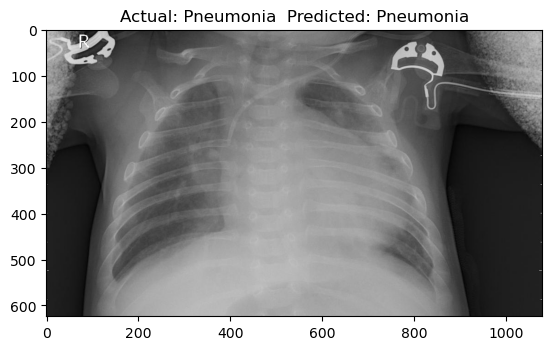

In [53]:
import time

start_time = time.time()
val_images=[]
image = cv2.cvtColor(cv2.imread('chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1_virus_12.jpeg'), cv2.COLOR_BGR2GRAY)
img = np.array(image)
img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))/255
val_images.append(img)

val_images = np.array(val_images)
final_val_result = model.predict(val_images)

data_ = df.loc[df['Filename'] == 'chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1_virus_12.jpeg', 'result'].values[0]
val_result = np.array(data_)
final_val = (final_val_result>0.5).astype(int)
# accuracy_score(val_result, final_val)
val_result_list = val_result.tolist()
d = {1: 'Pneumonia', 0: 'Normal'}
a=d[val_result_list]
img = cv2.imread('chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1_virus_12.jpeg')
plt.imshow(img)
plt.title('Actual: '+a+ '  ' + 'Predicted: '+d[final_val[0][0]])
plt.show()

end_time = time.time()
tfruntime = end_time - start_time


In [54]:
print(f'Normal tensorflow model took {tfruntime:.2f} seconds')

Normal tensorflow model took 0.32 seconds


In [39]:
import openvino as ov
core = ov.Core()
compiled_model=core.compile_model(model='model/model.xml',device_name='CPU')
input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)

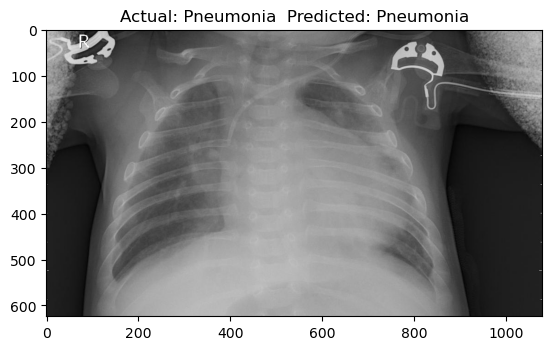

In [48]:
import time

start_time = time.time()
val_images=[]
image = cv2.cvtColor(cv2.imread('chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1_virus_12.jpeg'), cv2.COLOR_BGR2GRAY)
img = np.array(image)
img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))/255
val_images.append(img)

val_images = np.array(val_images)
val_images = val_images.reshape((1, IMG_HEIGHT, IMG_WIDTH, 1))

final_val_result = compiled_model(val_images)[compiled_model.output(0)]

data_ = df.loc[df['Filename'] == 'chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1_virus_12.jpeg', 'result'].values[0]
val_result = np.array(data_)
final_val = (final_val_result>0.5).astype(int)
# accuracy_score(val_result, final_val)
val_result_list = val_result.tolist()
d = {1: 'Pneumonia', 0: 'Normal'}
a=d[val_result_list]
img = cv2.imread('chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1_virus_12.jpeg')
plt.imshow(img)
plt.title('Actual: '+a+ '  ' + 'Predicted: '+d[final_val[0][0]])
plt.show()

end_time = time.time()
irruntime = end_time - start_time


In [50]:
print(f'Inference using OpenVINO IR took {irruntime:.2f} seconds')

Inference using OpenVINO IR took 0.22 seconds
